# Term structure of interest rates

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov import tauchen
from qe_applications_asset_pricing import AssetPrices
from mult_functional import _solve_principal_eig

In [3]:
def term_structure(ap, J):
    n = ap.n
    P_hat = ap.beta * ap.P_check
    
    # Sequence of price vectors
    p = np.empty((J, n))
    p[0] = P_hat.dot(np.ones(n))
    for j in range(J-1):
        p[j+1] = P_hat.dot(p[j])

    # Term structure
    R = -np.log(p)
    R /= np.arange(1, J+1)[:, np.newaxis]
    
    return p, R

## Parameter values from [Exercise 1](http://quant-econ.net/py/markov_asset.html#exercise-1) in "Markov Asset Pricing":

In [4]:
n = 5
P = 0.0125 * np.ones((n, n))
P += np.diag(0.95 - 0.0125 * np.ones(5))
s = np.array([1.05, 1.025, 1.0, 0.975, 0.95])  # state values
gamma = 2.0
beta = 0.94

In [5]:
ap = AssetPrices(beta, P, s, gamma)

In [6]:
J = 200
p, R = term_structure(ap, J)

Determine the "high", "low", and "middle" states:

In [7]:
eig_val, eig_vec = _solve_principal_eig(ap.beta * ap.P_check)
lo = np.argsort(eig_vec)[0]
hi = np.argsort(eig_vec)[-1]
mid = np.argsort(eig_vec)[ap.n//2]

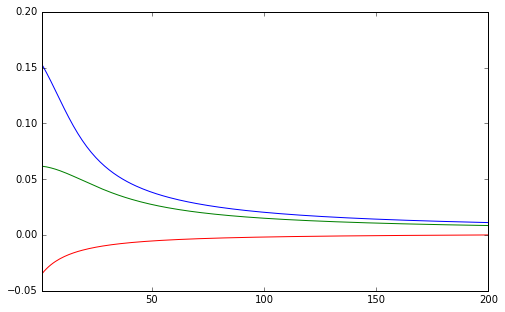

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
for i in [lo, mid, hi]:
    ax.plot(np.arange(1, J+1), R[:, i])
ax.set_xlim((1, J))
plt.show()

## Parameter values from `MC_mult_functional05.ipynb`:

In [9]:
mu_C = .005  # mean of quarterly per capita consumption growth
sigma_C = .005  # standard deviation of quarterly per capita consumption growth
rho = .25  # persistence of per capita quarterly consumption growth

# standard deviation of the underlying noise distribution
sigma = sigma_C * np.sqrt(1 - rho**2)

m = 2  # number of standard deviations you would like the gridded vector y to cover
n = 5  # number of points in the discretization

y, P = tauchen(rho, sigma, m, n)
# mc = MarkovChain(P)

y += mu_C  # consumption growth rate vector

# Discount rate
delta = .01

# Coefficient of relative risk aversion
gamma = 20

In [10]:
# Discount factor
beta = np.exp(-delta)

# Consumption growth factor vector
s = np.exp(y)

In [11]:
beta

0.99004983374916811

In [12]:
s

array([ 0.99501248,  1.        ,  1.00501252,  1.01005017,  1.01511306])

In [13]:
ap = AssetPrices(beta, P, s, gamma)

In [14]:
J = 20
p, R = term_structure(ap, J)

In [15]:
R

array([[ 0.05732179,  0.08103259,  0.10515373,  0.12937031,  0.15337385],
       [ 0.07424111,  0.08891904,  0.1038699 ,  0.11889703,  0.13380842],
       [ 0.08254966,  0.09278489,  0.10321402,  0.11369969,  0.12410787],
       [ 0.08718206,  0.09493934,  0.10284426,  0.11079268,  0.11868298],
       [ 0.09005315,  0.09627448,  0.10261435,  0.10898924,  0.11531763],
       [ 0.09198551,  0.09717306,  0.10245947,  0.1077751 ,  0.11305199],
       [ 0.09336954,  0.09781664,  0.10234851,  0.10690543,  0.11142914],
       [ 0.09440835,  0.09829969,  0.10226521,  0.10625266,  0.11021105],
       [ 0.09521648,  0.09867548,  0.10220042,  0.10574484,  0.10926344],
       [ 0.09586302,  0.09897613,  0.10214858,  0.10533857,  0.10850531],
       [ 0.09639201,  0.09922212,  0.10210616,  0.10500615,  0.10788501],
       [ 0.09683284,  0.09942711,  0.10207081,  0.10472914,  0.1073681 ],
       [ 0.09720586,  0.09960056,  0.10204091,  0.10449474,  0.1069307 ],
       [ 0.09752558,  0.09974923,  0.1

In [16]:
eig_val, eig_vec = _solve_principal_eig(ap.beta * ap.P_check)
lo = np.argsort(eig_vec)[0]
hi = np.argsort(eig_vec)[-1]
mid = np.argsort(eig_vec)[ap.n//2]

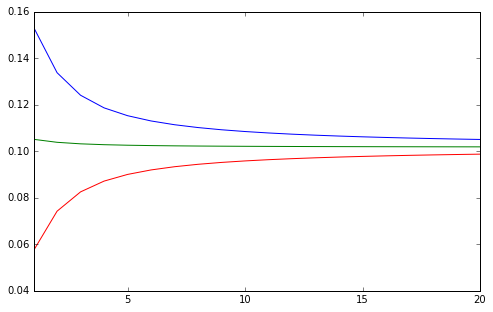

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
for i in [lo, mid, hi]:
    ax.plot(np.arange(1, J+1), R[:, i])
ax.set_xlim((1, J))
plt.show()